In [44]:
#
# hw9pr2a.ipynb ~ cs35/cs181 spring 2021
#

In [45]:
#
# libraries we have...
#
import numpy as np
from matplotlib import pyplot as plt
import cv2
import seaborn as sns

image with name Princess.png read with dimensions: (1411, 1280, 3)
resizing to rows, cols = 705, 640


<IPython.core.display.Javascript object>


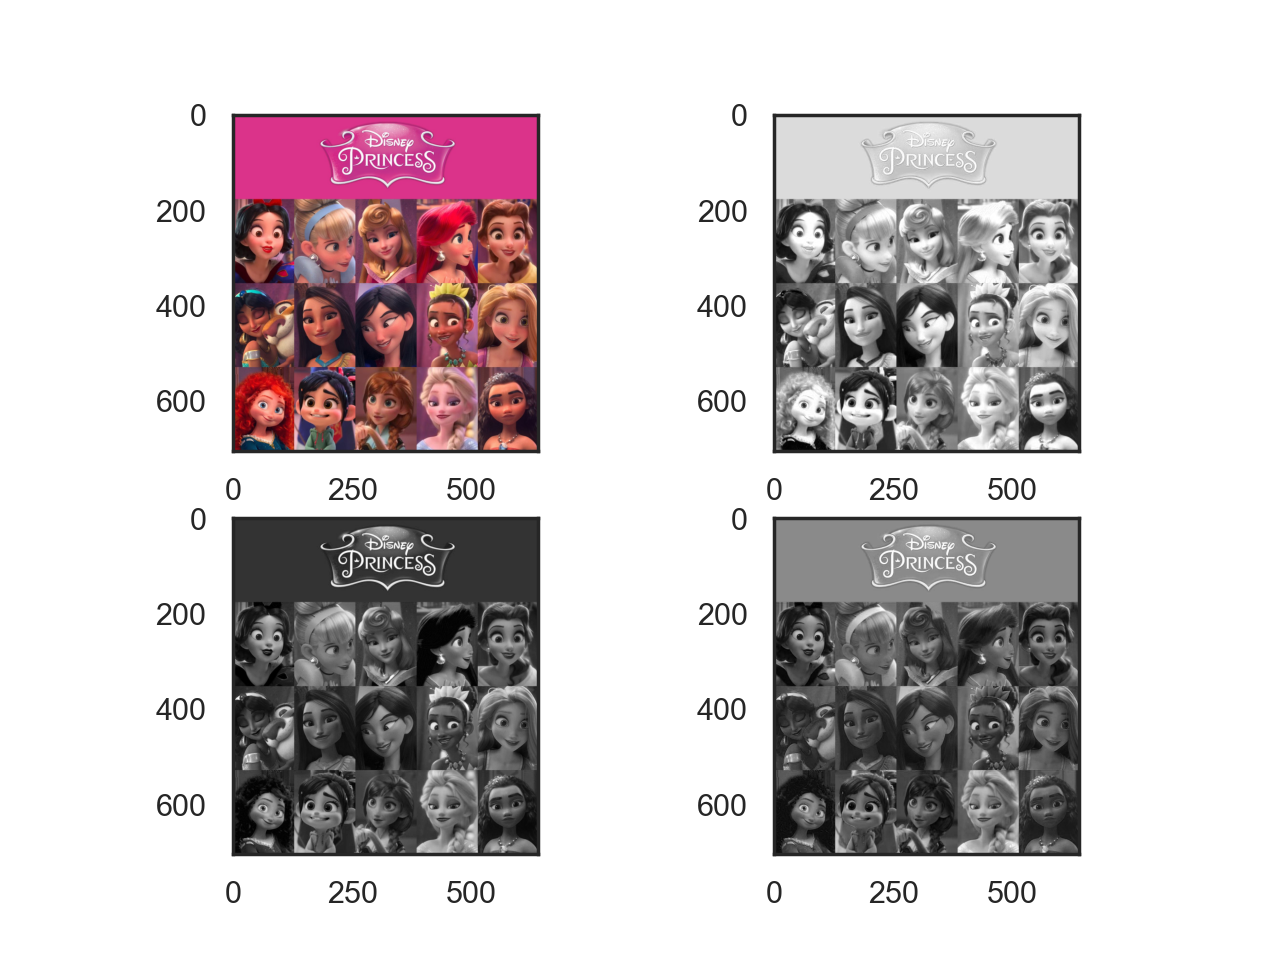

In [46]:
%matplotlib notebook 


def opencv_open_into_rgb( image_file_name ):
    """ open image_file_name and convert to rgb """
    image_raw = cv2.imread(image_file_name, cv2.IMREAD_COLOR)  # reads into BGR
    orig_num_rows, orig_num_cols, _ = image_raw.shape          # cool underscore variable!
    num_rows, num_cols, _ = image_raw.shape
    print(f"image with name {image_file_name} read with dimensions: {image_raw.shape}")
    #
    # let's resize as long as any dimension is > 840...
    #
    maxdim = max(num_rows,num_cols)
    while maxdim > 840:
        num_rows = num_rows//2  # halve!
        num_cols = num_cols//2  # halve!
        maxdim = max(num_rows,num_cols) # try again...
        
    if orig_num_rows != num_rows: # did we resize?
        print(f"resizing to rows, cols = {num_rows}, {num_cols}")
        image_raw = cv2.resize(image_raw, dsize=(num_cols,num_rows), interpolation=cv2.INTER_LINEAR)  # resizing
        
    # now, convert to rgb
    image_rgb = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)     # convert from BGR to RGB
    return image_rgb


image_rgb = opencv_open_into_rgb("Princess.png") 

fig, ax = plt.subplots(2,2)  # this means ax will be a 2x2 numpy array of axes!
ax[0,0].imshow(image_rgb)
ax[0,1].imshow(image_rgb[:,:,0],cmap="gray")  # red-channel image
ax[1,0].imshow(image_rgb[:,:,1],cmap="gray")  # green-channel image
ax[1,1].imshow(image_rgb[:,:,2],cmap="gray")  # blue-channel image

In [47]:
# these are "cascades," the pre-trained, "transferred" models...
#

# https://github.com/opencv/opencv/tree/master/data/haarcascades
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades_cuda/haarcascade_profileface.xml



cascPath = "./haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

image with name Princess_face.png read with dimensions: (813, 983, 3)
resizing to rows, cols = 406, 491


<IPython.core.display.Javascript object>


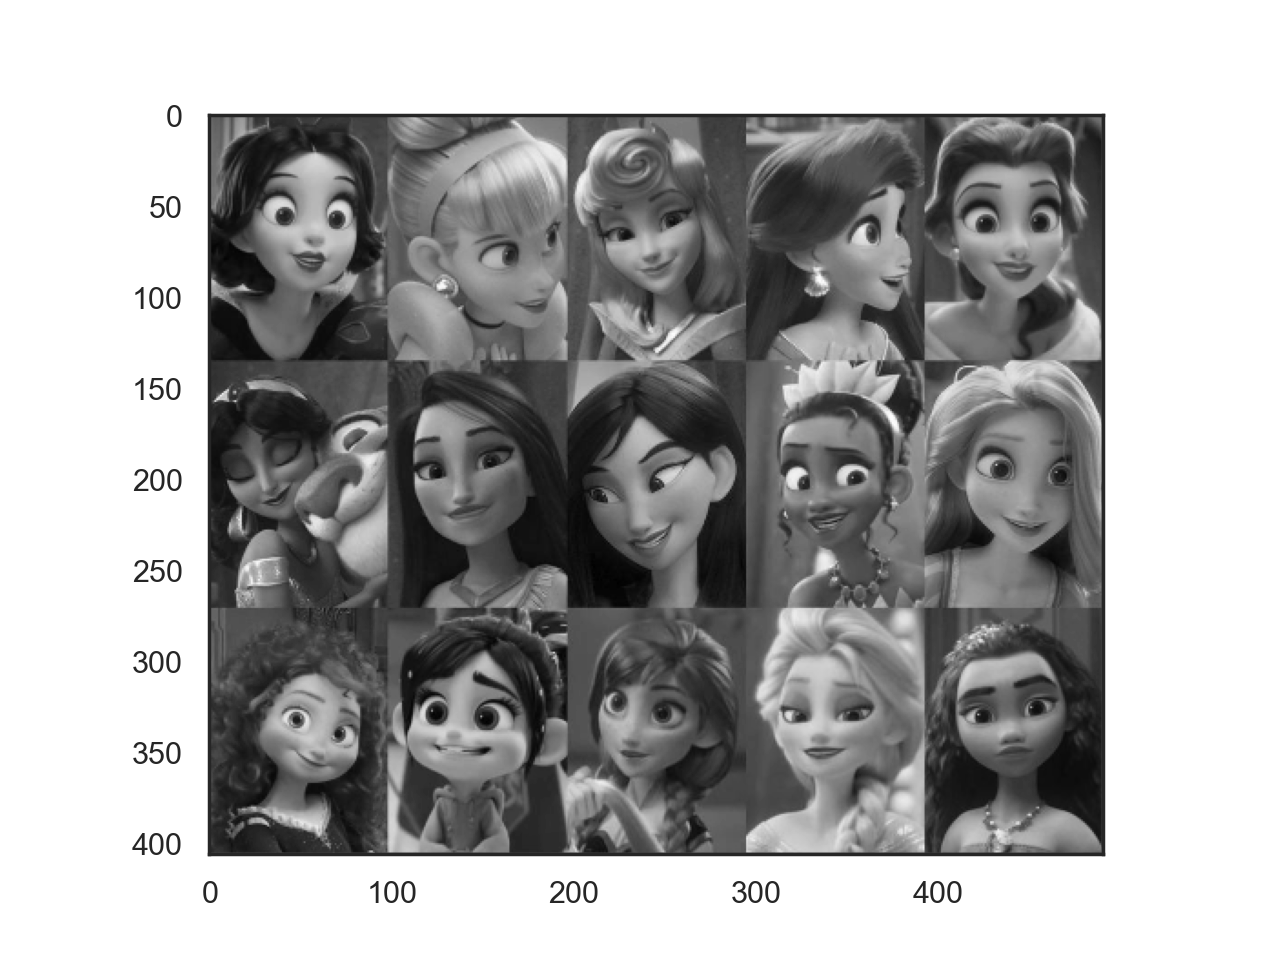

In [48]:
# Read the image
image_faces_rgb = opencv_open_into_rgb("Princess_face.png")
image_faces_gray = cv2.cvtColor(image_faces_rgb, cv2.COLOR_RGB2GRAY)


fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
ax.imshow(image_faces_gray,cmap="gray")

In [49]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    image_faces_gray,
    scaleFactor=1.05,
    minNeighbors=1,
    minSize=(10,10),
    flags = cv2.CASCADE_SCALE_IMAGE,
)
print(f"Found {len(faces)} faces!")

Found 13 faces!


In [50]:
for i, face in enumerate(faces):
    x,y,w,h = face
    print(f"face {i}: {face}")

face 0: [21 27 72 72]
face 1: [212  41  59  59]
face 2: [400  24  85  85]
face 3: [ 75  12 147 147]
face 4: [ 97 159  82  82]
face 5: [200 180  68  68]
face 6: [411 167  77  77]
face 7: [ 94 203 117 117]
face 8: [236 260  51  51]
face 9: [205 302  64  64]
face 10: [ 98 295  88  88]
face 11: [294 294  81  81]
face 12: [396 292  85  85]


Drawn!!


<IPython.core.display.Javascript object>


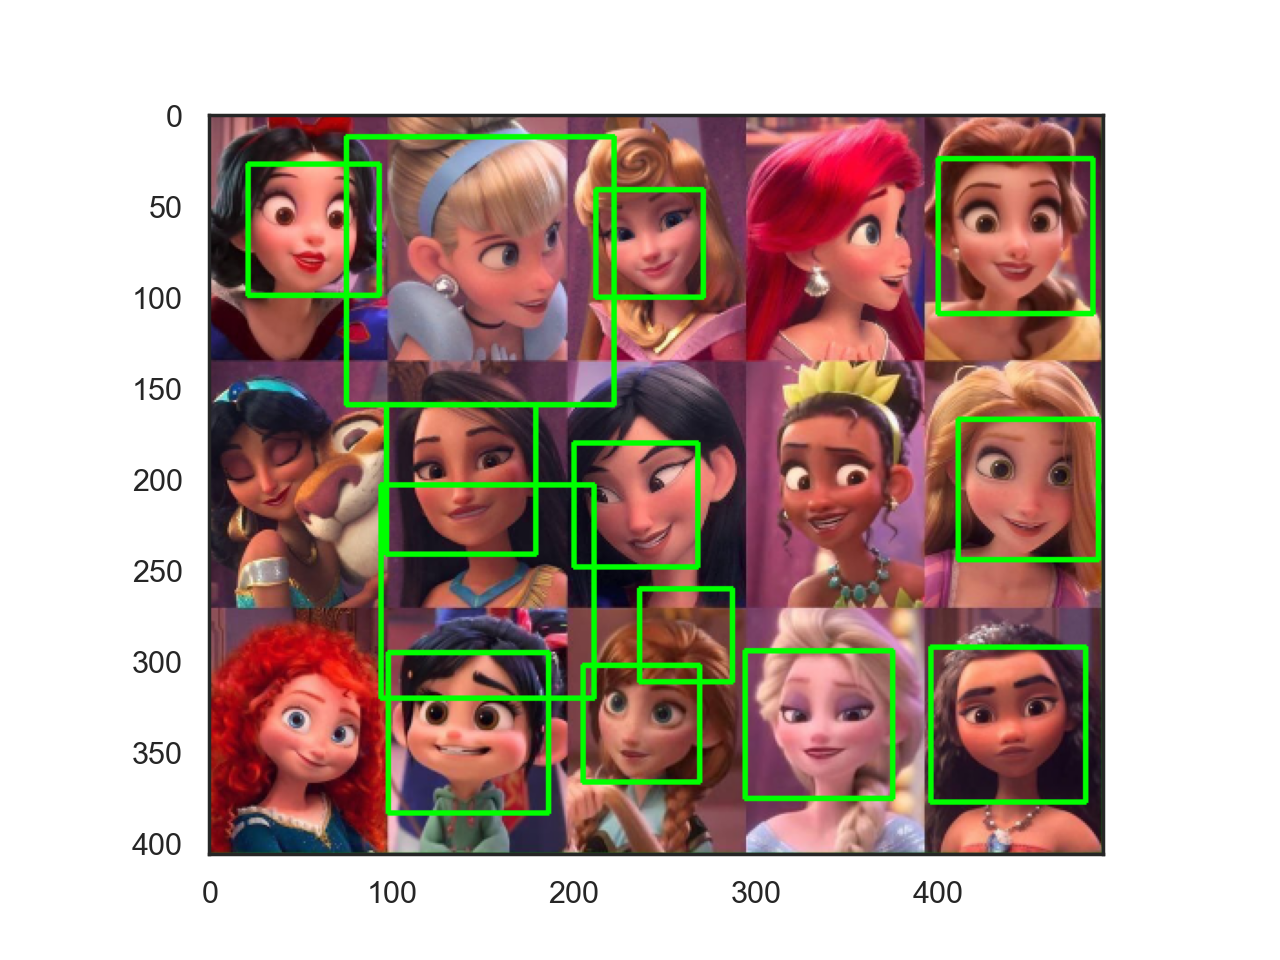

In [51]:
image_faces_drawn_rgb = image_faces_rgb.copy()

for (x, y, w, h) in faces:
    # note that this draws on the color image!
    cv2.rectangle(image_faces_drawn_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2) 
    
    
print(f"Drawn!!")

LoFi = []  # list of Face images

for (x, y, w, h) in faces:
    # note that this draws on the color image!
    face = image_faces_rgb[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    LoFi.append( face )

#
# let's show off how to create multiple images in one figure, too
#
fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
ax.imshow(image_faces_drawn_rgb)

<IPython.core.display.Javascript object>


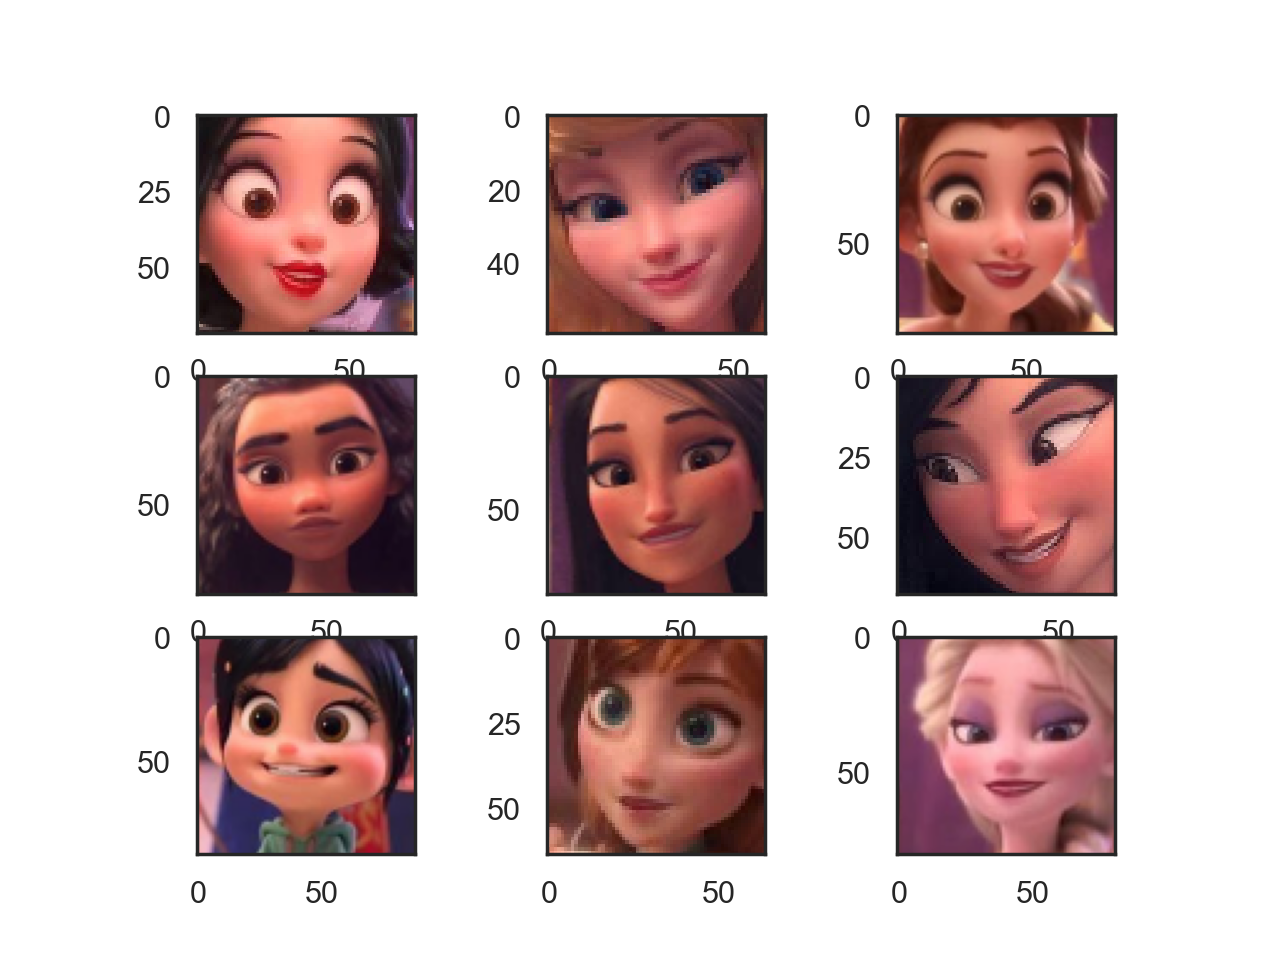

In [52]:
len(LoFi)
fig, ax = plt.subplots(3,3) 

ax[0,0].imshow(LoFi[0])
ax[0,1].imshow(LoFi[1])
ax[0,2].imshow(LoFi[2])
ax[1,0].imshow(LoFi[12])
ax[1,1].imshow(LoFi[4])
ax[1,2].imshow(LoFi[5])
ax[2,0].imshow(LoFi[10])
ax[2,1].imshow(LoFi[9])
ax[2,2].imshow(LoFi[11])

<IPython.core.display.Javascript object>


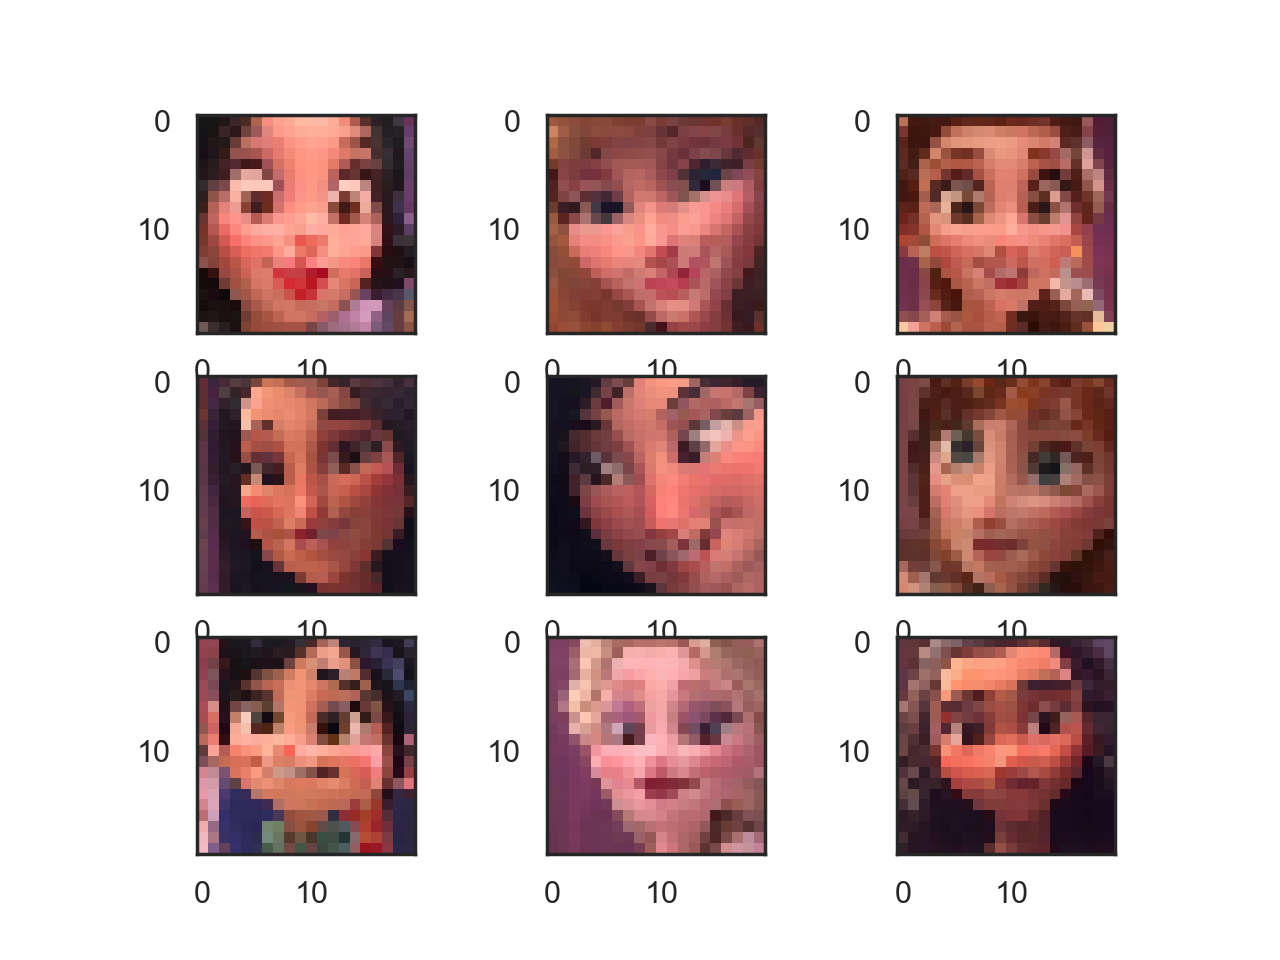

In [53]:
LoLoFi = [ cv2.resize(LoFiIm,dsize=(20,20)) for LoFiIm in LoFi ]
fig, ax = plt.subplots(3,3)

ax[0,0].imshow(LoLoFi[0])
ax[0,1].imshow(LoLoFi[1])
ax[0,2].imshow(LoLoFi[2])
ax[1,0].imshow(LoLoFi[4])
ax[1,1].imshow(LoLoFi[5])
ax[1,2].imshow(LoLoFi[9])
ax[2,0].imshow(LoLoFi[10])
ax[2,1].imshow(LoLoFi[11])
ax[2,2].imshow(LoLoFi[12])

In [54]:
A = np.zeros( (3,3) )
for r in range(3):
    for c in range(3):
        res = cv2.matchTemplate(LoLoFi[r],LoLoFi[c],cv2.TM_SQDIFF_NORMED)
        # res is a 2d image, so... we extract the value
        A[r,c] = res[0,0]
        
with np.printoptions(precision=3, suppress=True):  # suppress suppresses exponential notation!
    print(f"{A}")

[[0.    0.233 0.223]
 [0.233 0.    0.18 ]
 [0.223 0.18  0.   ]]


<IPython.core.display.Javascript object>


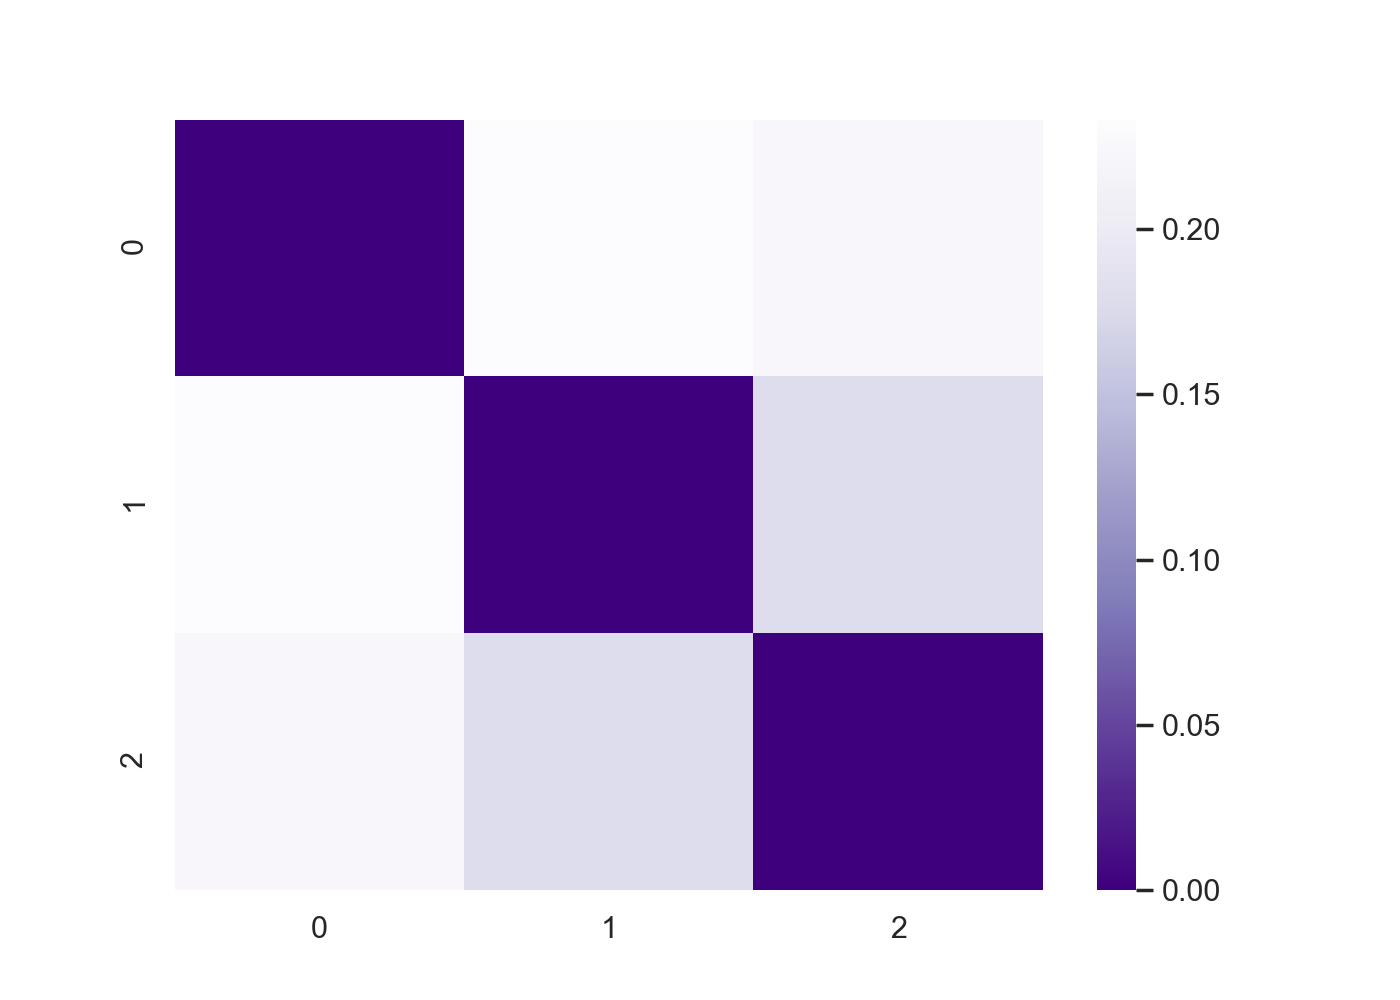

<AxesSubplot:>

In [55]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(A, cmap="Purples_r") 

image with name IMG_1671.jpg read with dimensions: (2880, 2160, 3)
resizing to rows, cols = 720, 540


<IPython.core.display.Javascript object>


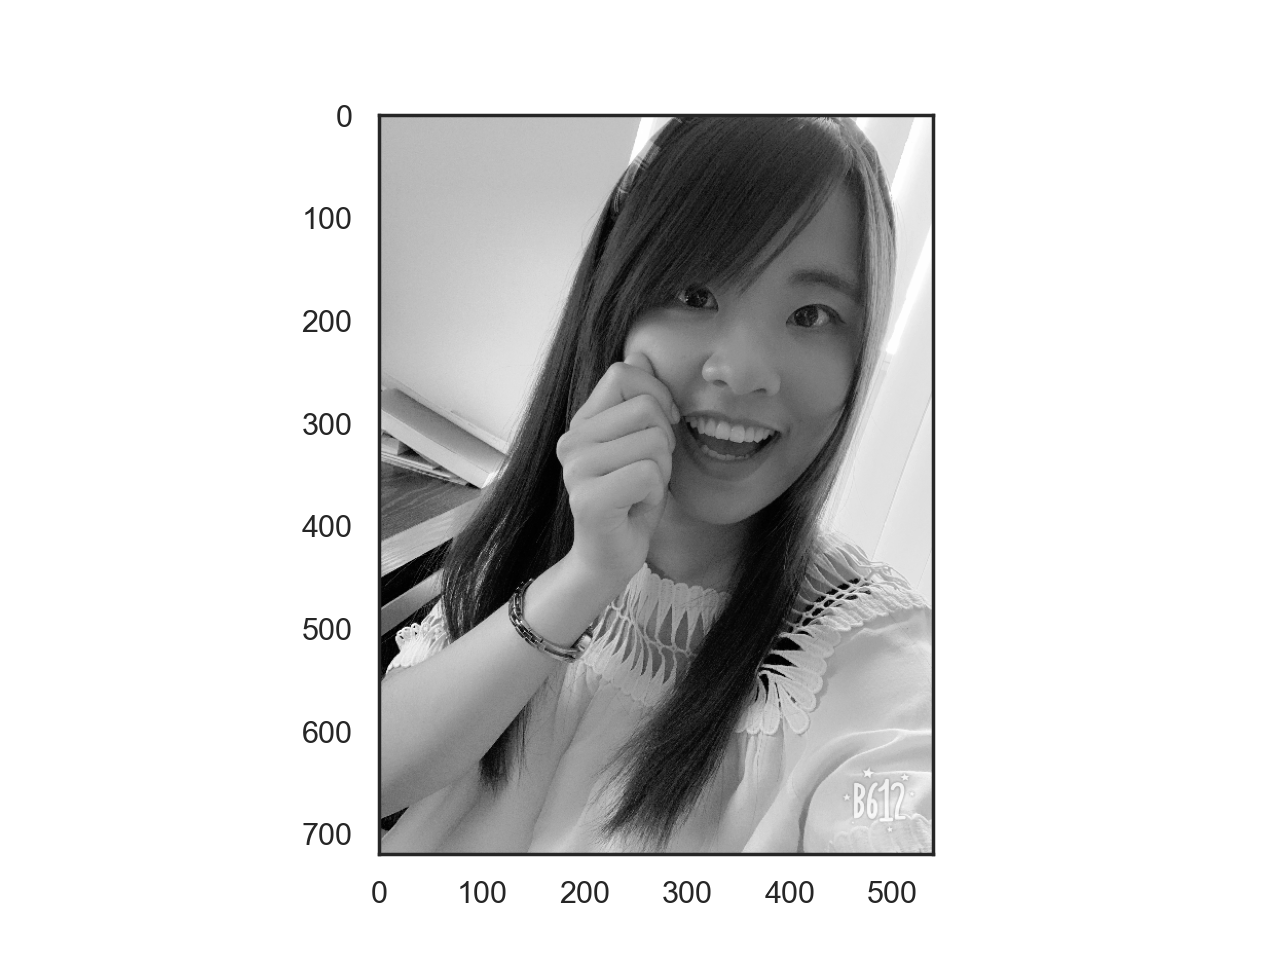

In [56]:
image_faces_rgb_1 = opencv_open_into_rgb("IMG_1671.jpg")
image_faces_gray_1 = cv2.cvtColor(image_faces_rgb_1, cv2.COLOR_RGB2GRAY)
    



fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
ax.imshow(image_faces_gray_1,cmap="gray")

In [57]:
faces_1 = faceCascade.detectMultiScale(
    image_faces_gray_1,
    scaleFactor=1.05,
    minNeighbors=1,
    minSize=(10,10),
    flags = cv2.CASCADE_SCALE_IMAGE,
)
print(f"Found {len(faces_1)} faces!")

Found 3 faces!


In [58]:
for i, face in enumerate(faces_1):
    x,y,w,h = face
    print(f"face {i}: {face}")

face 0: [198  77 315 315]
face 1: [174 383 150 150]
face 2: [342 586  58  58]


Drawn!!


<IPython.core.display.Javascript object>


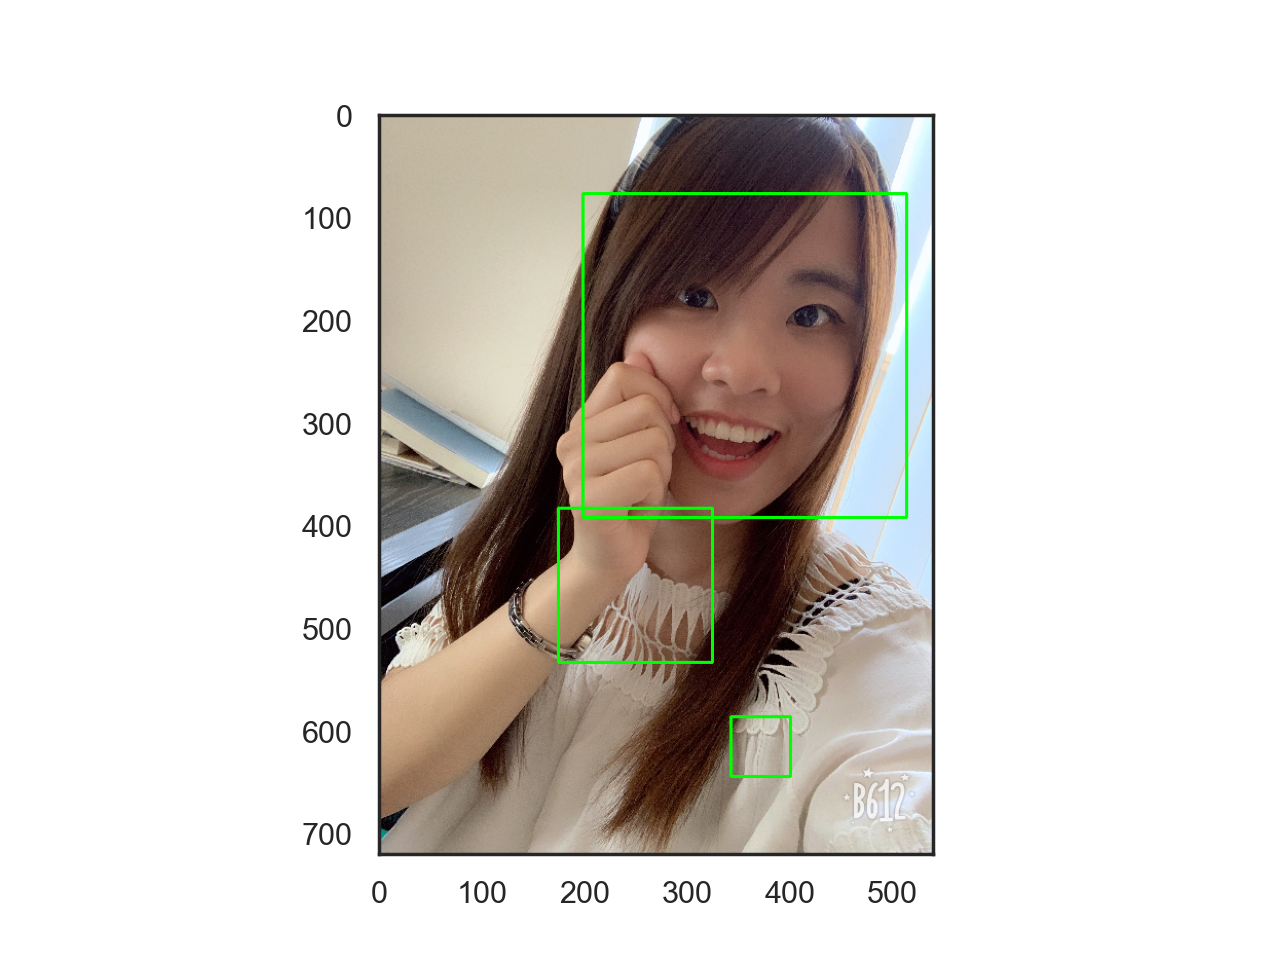

In [59]:
image_faces_drawn_rgb_1 = image_faces_rgb_1.copy()



for (x, y, w, h) in faces_1:
    # note that this draws on the color image!
    cv2.rectangle(image_faces_drawn_rgb_1, (x, y), (x+w, y+h), (0, 255, 0), 2) 

print(f"Drawn!!")

LoFi_1 = []  # list of Face images

for (x, y, w, h) in faces_1:
    # note that this draws on the color image!
    face_1 = image_faces_rgb_1[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    LoFi_1.append( face_1 )

#
# let's show off how to create multiple images in one figure, too
#
fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
ax.imshow(image_faces_drawn_rgb_1)

<IPython.core.display.Javascript object>


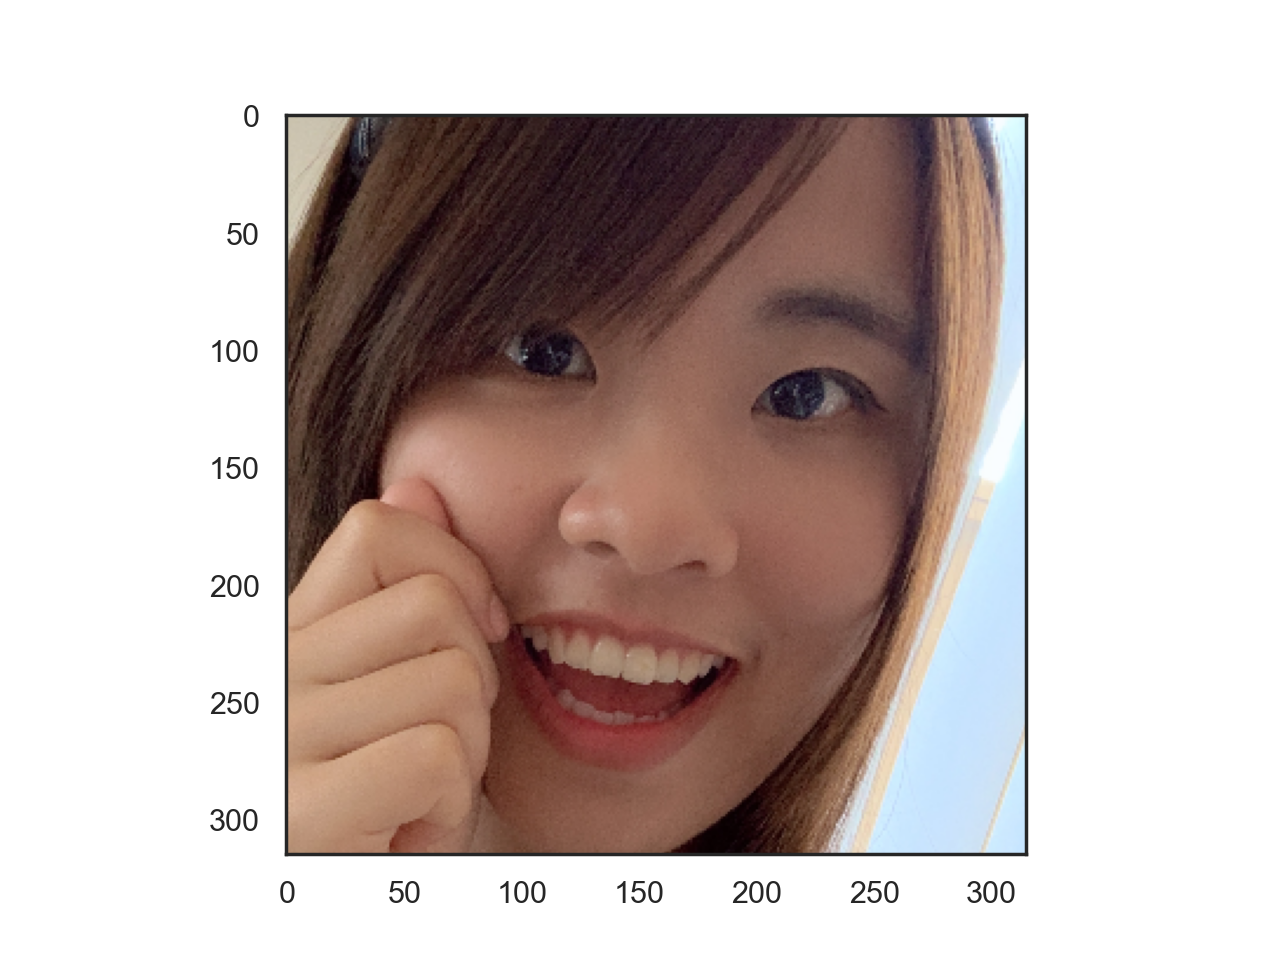

In [60]:
len(LoFi_1)
fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
#ax[0,0].imshow(LoFi[0])
#ax[0,0].imshow(cv2.resize(LoFi[0],dsize=(20,20)))
ax.imshow(LoFi_1[0])



<IPython.core.display.Javascript object>


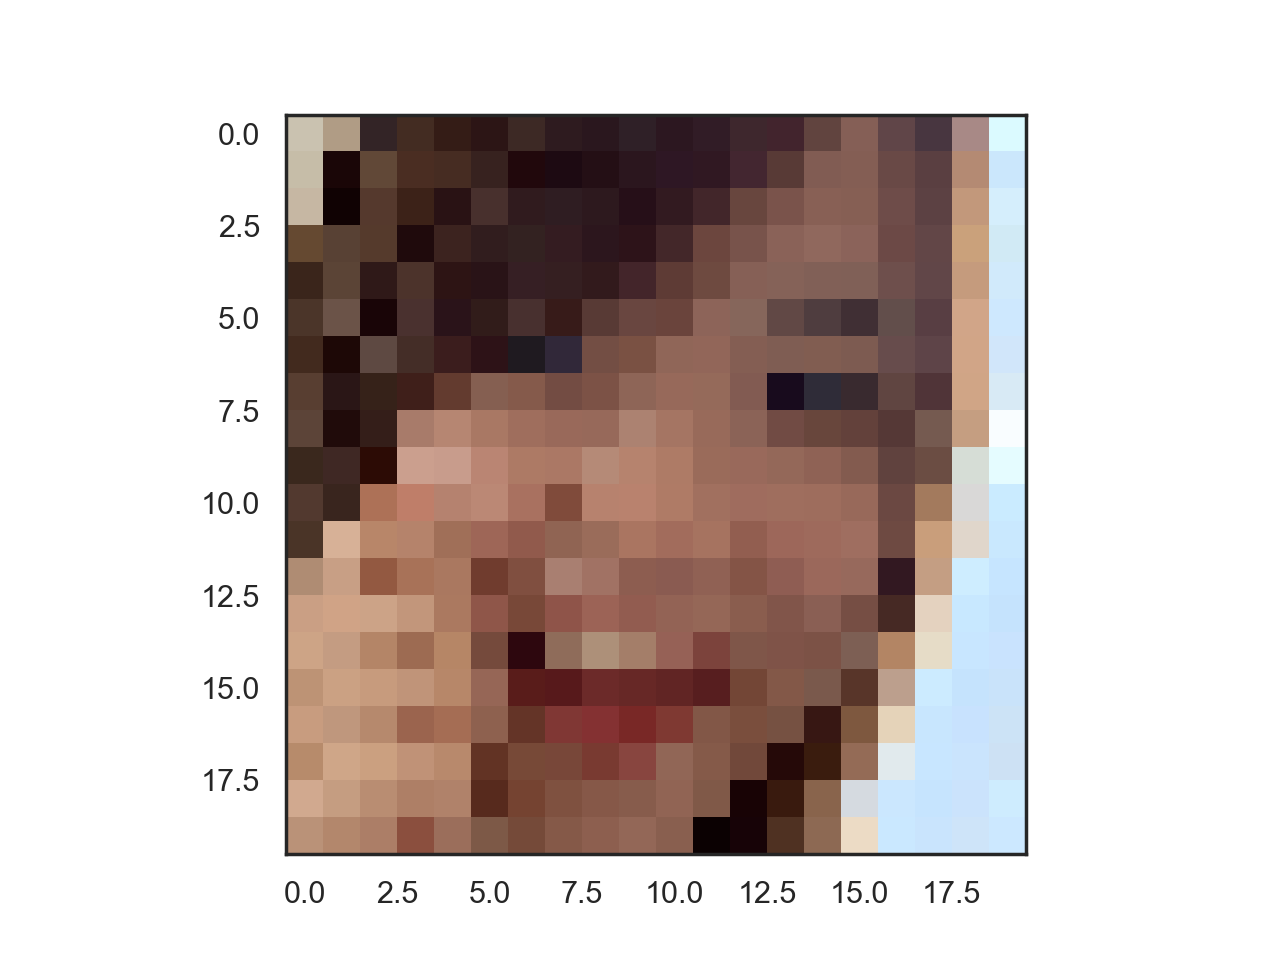

In [61]:
LoLoFi_1 = [ cv2.resize(LoFiIm,dsize=(20,20)) for LoFiIm in LoFi_1 ]
fig, ax = plt.subplots(1,1) 

ax.imshow(LoLoFi_1[0])


<IPython.core.display.Javascript object>


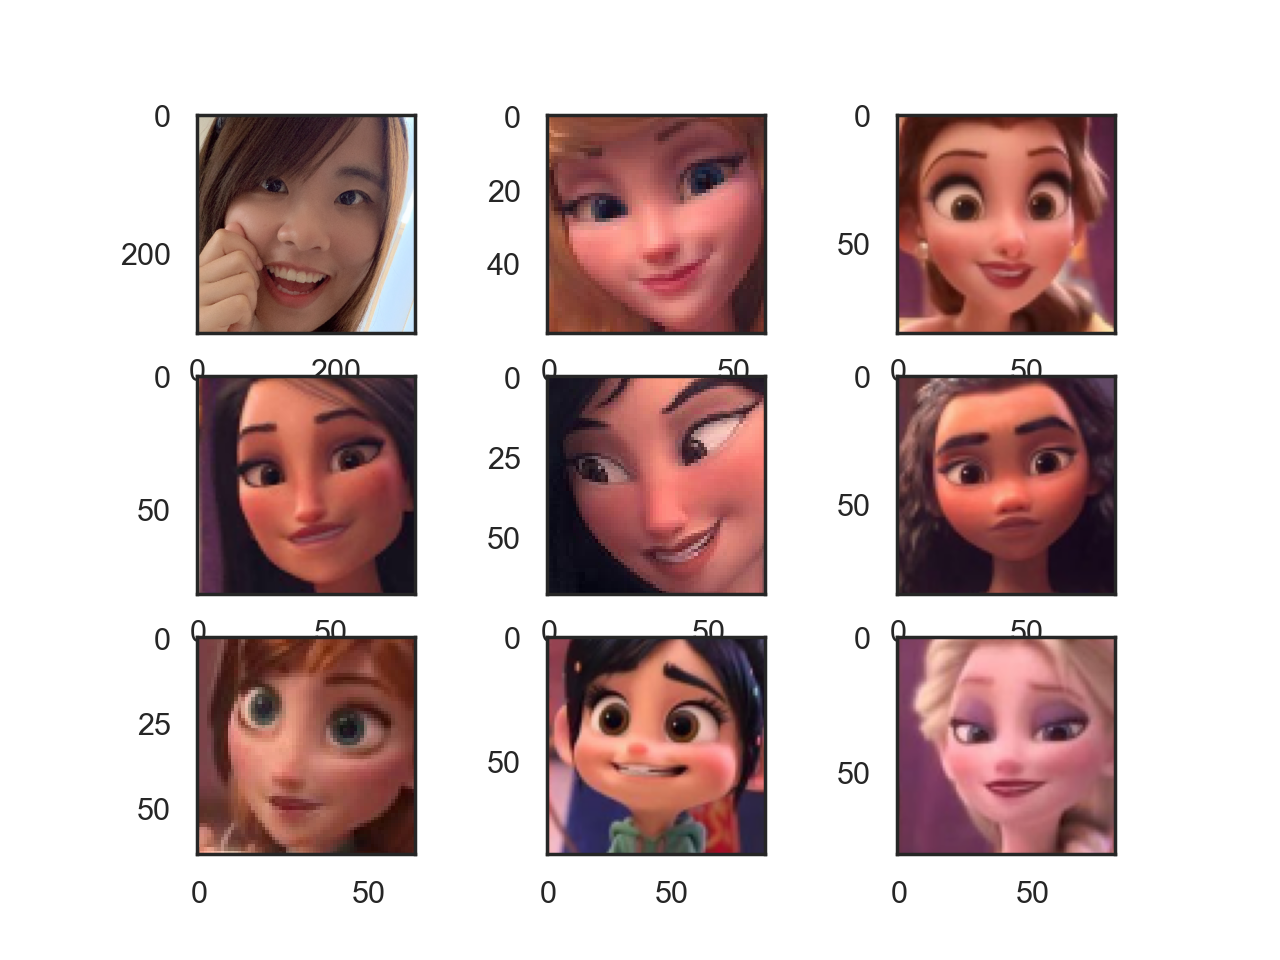

In [62]:
len(LoFi)
fig, ax = plt.subplots(3,3) 


one=ax[0,0].imshow(LoFi_1[0])
two=ax[0,1].imshow(LoFi[1])
three=ax[0,2].imshow(LoFi[2])
four=ax[1,0].imshow(LoFi[4])
five=ax[1,1].imshow(LoFi[5])
six=ax[1,2].imshow(LoFi[12])
seven=ax[2,0].imshow(LoFi[9])
eight=ax[2,1].imshow(LoFi[10])
nine=ax[2,2].imshow(LoFi[11])

In [63]:
A = np.zeros( (3,3) )
for r in range(3):
    for c in range(3):
        res = cv2.matchTemplate(LoLoFi[r],LoLoFi[c],cv2.TM_SQDIFF_NORMED)
        # res is a 2d image, so... we extract the value
        A[r,c] = res[0,0]
        
with np.printoptions(precision=3, suppress=True):  # suppress suppresses exponential notation!
    print(f"{A}")
    

[[0.    0.233 0.223]
 [0.233 0.    0.18 ]
 [0.223 0.18  0.   ]]


<IPython.core.display.Javascript object>


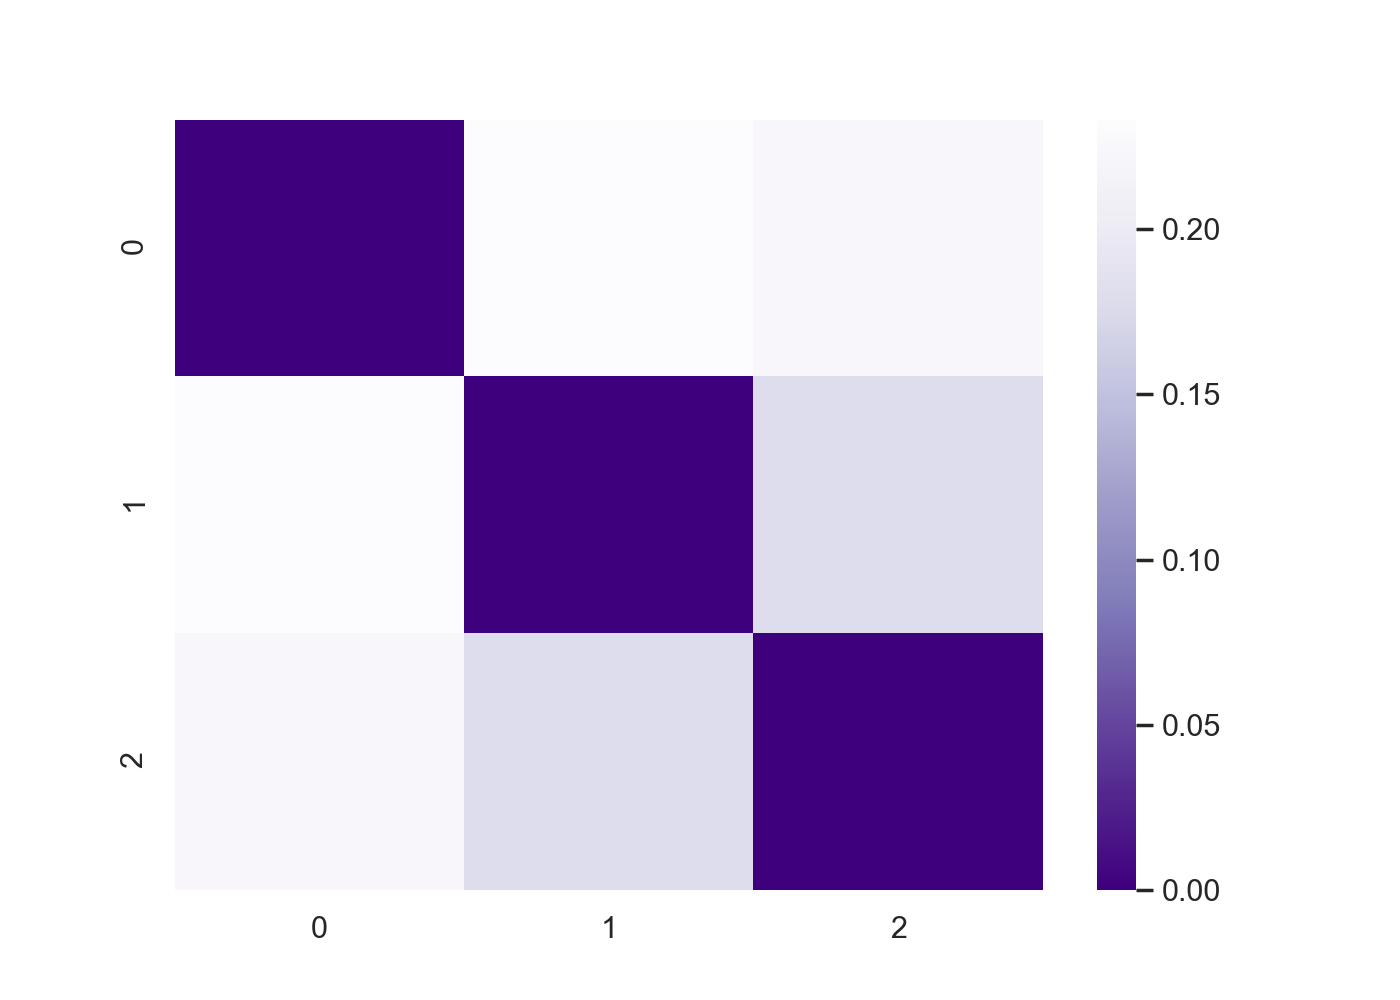

<AxesSubplot:>

In [64]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(A, cmap="Purples_r") # Purples_r
#, cmap="Gray", vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<IPython.core.display.Javascript object>


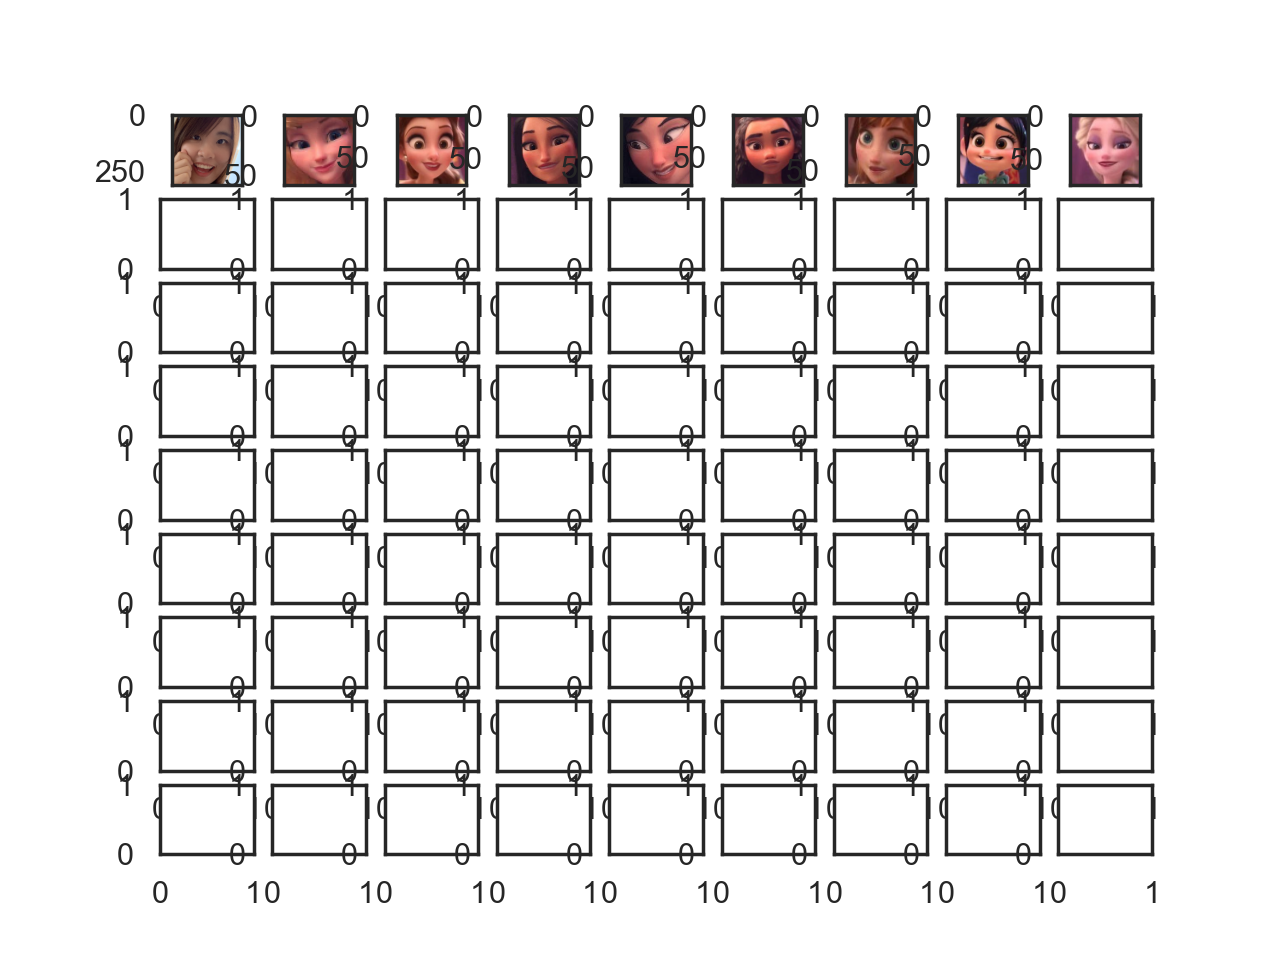

In [65]:
len(LoFi)
fig, ax = plt.subplots(9,9) 


one=ax[0,0].imshow(LoFi_1[0])
two=ax[0,1].imshow(LoFi[1])
three=ax[0,2].imshow(LoFi[2])
four=ax[0,3].imshow(LoFi[4])
five=ax[0,4].imshow(LoFi[5])
six=ax[0,5].imshow(LoFi[12])
seven=ax[0,6].imshow(LoFi[9])
eight=ax[0,7].imshow(LoFi[10])
nine=ax[0,8].imshow(LoFi[11])




In [66]:
A = np.zeros( (9,9) )
for r in range(1):
    for c in range(9):
        res = cv2.matchTemplate(LoLoFi[r],LoLoFi[c],cv2.TM_SQDIFF_NORMED)
        # res is a 2d image, so... we extract the value
        A[r,c] = res[0,0]
        
with np.printoptions(precision=3, suppress=True):  # suppress suppresses exponential notation!
    print(f"{A}")
    
    
match=np.amax(A) 
A[0,0]=42


location=np.argmin(A[0])
print(match,'/',location)

[[0.    0.233 0.223 0.287 0.353 0.33  0.19  0.606 0.416]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
0.6062824130058289 / 6


<IPython.core.display.Javascript object>


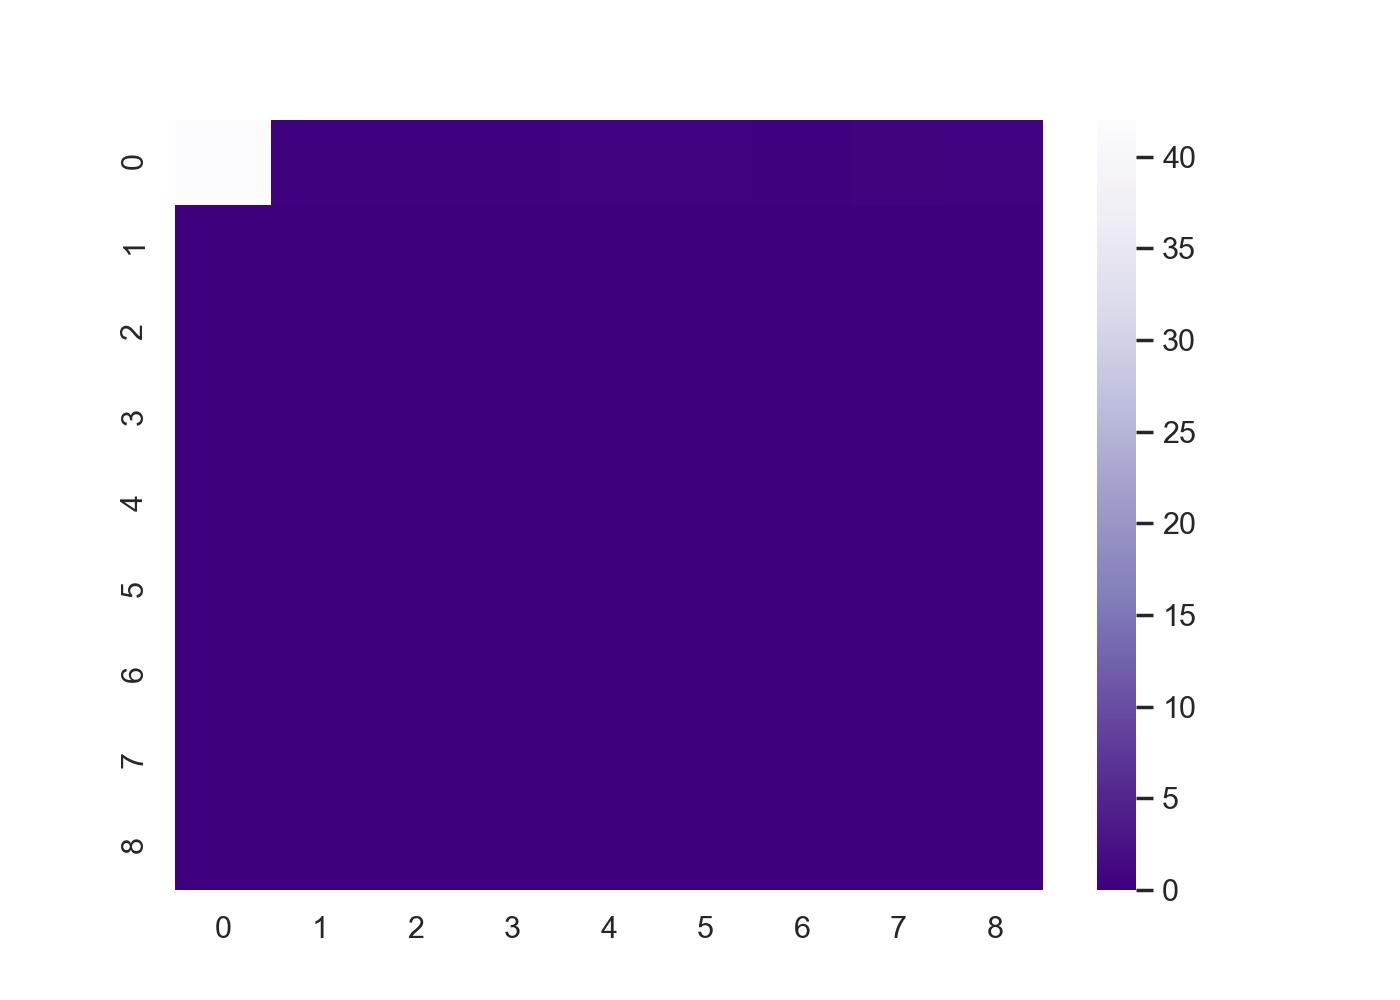

<AxesSubplot:>

In [67]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(A, cmap="Purples_r") # Purples_r
#, cmap="Gray", vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})